In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
NO=True   
sin2_th12 = 0.307
sin2_th13 = 0.0220
dm2_21 = 7.53e-5
sin2_th23 = 0.546
if NO: dm2_32 = 2.453e-3
else: dm2_32 = -2.536e-3
dm2_31 = dm2_32 + dm2_21
me_rho = 2.45

In [49]:
def osc_formula(E, L,sin2_th12, sin2_th13, dm2_21, dm2_31, dm2_32, me_rho):
    factor = 1.267 #1.267e3 #(L/E factor)

    cos2_th12 = 1. - sin2_th12
    cos_2th12 = cos2_th12 - sin2_th12
    cos2_th13 = 1. - sin2_th13
    cos_2th13 = cos2_th13 - sin2_th13
    
    if me_rho != 0.0:

        Ye = 0.5
        Acc = 1.52*1e-7*Ye*me_rho*E # eV^2/MeV from Jinnan
    #
        sin2_th12 = sin2_th12 * (1 - 2 * Acc * cos2_th12 / dm2_21)   # YB eq.3.6, p.45
        dm2_21 = dm2_21 * (1 + Acc * cos_2th12 / dm2_21)
        sin2_th13 = sin2_th13 * (1 - 2 * Acc * cos2_th13 / dm2_31)   # YB eq.3.6, p.45
        dm2_31 = dm2_31 * (1 + Acc * cos_2th13 / dm2_31)
#     #
        cos2_th12 = 1. - sin2_th12
        cos_2th12 = cos2_th12 - sin2_th12
        cos2_th13 = 1. - sin2_th13
        cos_2th13 = cos2_th13 - sin2_th13
  #
    sin2_2th12 = 4.*sin2_th12*cos2_th12
    sin2_2th13 = 4.*sin2_th13*cos2_th13
    cos4_th13 = cos2_th13**2
    dm2_32 = dm2_31 - dm2_21
  #

    t1 = sin2_2th12 * cos4_th13 * np.sin(factor * dm2_21 * L/E)**2
    t2 = sin2_2th13 * cos2_th12 * np.sin(factor * dm2_31 * L/E)**2
    t3 = sin2_2th13 * sin2_th12 * np.sin(factor * dm2_32 * L/E)**2

    return 1. - t1 - t2 - t3

In [50]:
def survival_probability(E):
    L = [52740.0, 52820.0, 52410.0, 52490.0, 52110.0, 52190.0, 52770.0, 52640.0, 215000.0]
    core_powers =[2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 4.6, 4.6, 17.4]
    total_prob=np.zeros(len(E))
 
    core_shares = [p/(l*l) for p, l in zip(core_powers, L)]
    core_shares = [p/sum(core_shares) for p in core_shares]
    print(core_shares)
    for l, share in zip(L, core_shares):
        probabilities = []
        P = lambda E: osc_formula(E, l, sin2_th12=sin2_th12, sin2_th13=sin2_th13,
                          dm2_21=dm2_21, dm2_31=dm2_31, dm2_32=dm2_32,
                          me_rho=me_rho)
        for b in E:
            probabilities.append(P(b)*share)
        total_prob = total_prob + np.array(probabilities)
    return total_prob
        

[0.10414117062137858, 0.10382594970303481, 0.10545675089434214, 0.10513554262583731, 0.10667448619559934, 0.10634770258914067, 0.16500167445021588, 0.16581765866220202, 0.03759906425824916]


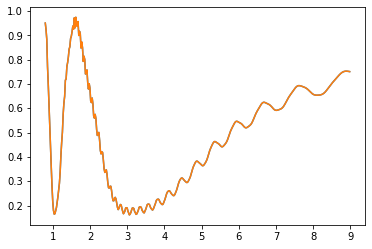

In [51]:
P_fitter = [0.9506853414884554, 0.9235330193437971, 0.8838986351491721, 0.7714780291144498, 0.6980335637001605, 0.6115181392688893, 0.5189389640508817, 0.4419222569296746, 0.3602093442162617, 0.2813436653275808, 0.21757904104868625, 0.18016576759127884, 0.16479962495165287, 0.16666117516962198, 0.1786321936177122, 0.1923412024792236, 0.21423351445033706, 0.23727471615737658, 0.2642590862637512, 0.2925528402016504, 0.33945239912404396, 0.4069832855329703, 0.45973883728918363, 0.5017073557471167, 0.5748670771823066, 0.6212863016859983, 0.6492062051790428, 0.7159561842812192, 0.7209790415083812, 0.7720823446827327, 0.7881849835261844, 0.8110361639554525, 0.8433123536536566, 0.8533062198824101, 0.8870125038742434, 0.8968843407405694, 0.9157143555709321, 0.9385966965407527, 0.9255225035274085, 0.9723131665573573, 0.9313175185752075, 0.9747441920504836, 0.9430541537954055, 0.9373213979223971, 0.9570236579043899, 0.8998495494809934, 0.9168980674009742, 0.9068211351136574, 0.8481621435529053, 0.8730098083001245, 0.8498282824709684, 0.7930848605497741, 0.8144038332824125, 0.801281887635964, 0.7411474681933693, 0.7470693516742197, 0.7581772330343333, 0.7059162906102813, 0.6792426330806883, 0.7014101727624691, 0.6833365114942337, 0.6309754079822828, 0.6237256795763273, 0.6425628593256726, 0.6176670189206244, 0.5691953921495951, 0.5597586042155749, 0.5753456260480585, 0.5584866949458678, 0.5121446539210025, 0.48848856382224737, 0.49909398910616143, 0.5009903080465578, 0.4677182312898865, 0.4262565489505429, 0.41260156608004184, 0.4214800612638113, 0.4185922554231385, 0.3884272944865098, 0.3516912894426383, 0.33648997852771967, 0.3437178560383468, 0.34733628715256587, 0.3274232393718906, 0.29444878883826564, 0.27330882179115534, 0.27223336157028977, 0.2794873152734135, 0.2795254571704811, 0.263272993851874, 0.2371114534759286, 0.22011066937225648, 0.21990172493996832, 0.2277044224762628, 0.23384960478727154, 0.22707265684785108, 0.2084829212861622, 0.19252658218713994, 0.18361230689818578, 0.1890808937242076, 0.19896813026970764, 0.2045747072415724, 0.20186587710362824, 0.18797905486908795, 0.17625543654661047, 0.1665406135755645, 0.17099773032768262, 0.17758929596208065, 0.18994156665754738, 0.1914718794575814, 0.19027205133089176, 0.17772784664924007, 0.16982061048511285, 0.16166525477452326, 0.1651965929047613, 0.1717243473022213, 0.18221839286827957, 0.19018275000918325, 0.19004164775421384, 0.1877845571407338, 0.17608041608240738, 0.17059355138317958, 0.1639243436935518, 0.16591201629372976, 0.17368297848235695, 0.180625485142253, 0.19243262634413802, 0.1950767652973362, 0.19535562701380177, 0.19180751926978443, 0.18127243695604237, 0.17644593578304457, 0.17136521738126947, 0.17022586070469395, 0.17810003888176007, 0.18454446645631173, 0.19378116146409696, 0.20389825382979285, 0.20587193652406718, 0.20628937190949215, 0.2040758823281778, 0.1952375437352269, 0.1889041322301244, 0.1855174713968714, 0.1817019780163597, 0.18428313538027763, 0.19235162690527077, 0.19951846687044653, 0.20870181795979925, 0.2193505191202372, 0.2246292629169153, 0.22596731518932037, 0.2265813025738534, 0.22290644822243905, 0.21553268862475738, 0.2102577179996149, 0.20709927456966834, 0.20414737119875165, 0.2049038241667658, 0.211170653075025, 0.219190179280611, 0.22746915128618672, 0.2377832200964355, 0.24832629881274243, 0.25525653583983954, 0.2588406643580588, 0.26102472637098983, 0.2606571058407098, 0.25652083811261006, 0.2510418206581295, 0.2469107296506368, 0.24377930853924878, 0.2411935198320384, 0.24116086688807575, 0.2452512676948663, 0.25211250468214985, 0.25997615583068073, 0.26914086374463325, 0.28004163747598115, 0.2909331571464704, 0.29954028928975795, 0.3056693292301783, 0.31034889864159465, 0.31332815990862417, 0.31332127266702214, 0.3104183977203225, 0.3065279969329767, 0.30316220138314665, 0.3001287319488631, 0.297008524836051, 0.2948670593077737, 0.295476051273022, 0.2992559465496749, 0.30499046522185497, 0.311628206068353, 0.3195096001367648, 0.3293557936423535, 0.34058106705751523, 0.351332852364824, 0.3602026546555845, 0.3673417095734798, 0.3736170187178009, 0.3790240708324832, 0.38242289798987333, 0.38288053772206104, 0.38090525968659233, 0.3780762513027404, 0.37555226027203137, 0.3732130204058387, 0.3703486694611906, 0.36700368728691557, 0.36440935385899437, 0.364039891218124, 0.36634984525054204, 0.3705311887706007, 0.3754842398167247, 0.38093966412433594, 0.3875906984842263, 0.39616597202234316, 0.4064284686587065, 0.4170976897513502, 0.4267446452200705, 0.4347881667031569, 0.44168316960945236, 0.4481900858065782, 0.45444877961819297, 0.4597020181939837, 0.4628826000647449, 0.46351263669868525, 0.4621308337538639, 0.45991018792066896, 0.4578193600698188, 0.45602710358165605, 0.4540035571276557, 0.45118663481896426, 0.4476483593473891, 0.4442359548552442, 0.4421001810458732, 0.4419910499626897, 0.4438483046124227, 0.446963474447094, 0.45056101071455873, 0.4543610362506438, 0.45873209535995113, 0.46435531827157106, 0.4716616471000842, 0.48043880874530787, 0.4898643197506675, 0.49892377088791656, 0.5069277199463416, 0.5137982007887048, 0.5199642546683896, 0.5259597544080054, 0.531991764812928, 0.537745204817827, 0.5425283108133293, 0.5456540902359616, 0.5468224553028517, 0.5462836507814554, 0.5447027643419582, 0.5428175072950568, 0.5410883236495575, 0.5395290819955744, 0.5377953327501531, 0.5354644313237275, 0.5323459182725285, 0.5286567738527584, 0.5249775690328033, 0.5220226091048487, 0.5203478232095466, 0.5201420822174032, 0.5211967172338953, 0.5230558166792157, 0.5252642894013855, 0.5275913320423218, 0.5301276726863546, 0.5332204821573475, 0.5372861233265095, 0.5425927257456123, 0.5491113248610139, 0.5564973479653206, 0.5642037111801279, 0.5716708028978953, 0.5785103582103134, 0.5846088200905637, 0.5901141899681686, 0.5953201276776178, 0.600501081665178, 0.6057675376491478, 0.6109974050090102, 0.6158658831621651, 0.6199567421361678, 0.6229083028132026, 0.6245377074219468, 0.6248990418274534, 0.6242580848838106, 0.6229976328638167, 0.6214909537949171, 0.619989328989306, 0.6185613263719493, 0.617100863290492, 0.615396441052246, 0.6132338902599963, 0.6104958190385849, 0.6072247104309932, 0.6036308416141242, 0.6000453254573731, 0.5968360378271389, 0.5943146289085021, 0.592663613667163, 0.5919043393008688, 0.5919127698183663, 0.5924752175373691, 0.5933649005317521, 0.5944155104903619, 0.5955706060630824, 0.5968961688995816, 0.5985550951195043, 0.6007532411856537, 0.6036739176932582, 0.6074197386947613, 0.6119774150271791, 0.6172138119920229, 0.6229026816976267, 0.6287734405935546, 0.6345682243643576, 0.6400922874878621, 0.6452455642972426, 0.6500288209546183, 0.6545246343711264, 0.658859633780735, 0.6631585613142518, 0.6675019318624026, 0.6718973640605708, 0.6762706834860965, 0.6804778063086627, 0.6843334877158401, 0.6876493892404015, 0.690272299638092, 0.6921139245111461, 0.6931661158613306, 0.6934990333230938, 0.6932436155075418, 0.6925630235670793, 0.6916197454745143, 0.6905454968494693, 0.6894199663994273, 0.6882621928216558, 0.6870354957162447, 0.6856640550533694, 0.6840570124479589, 0.6821347462507709, 0.6798519072890341, 0.6772128056179555, 0.6742765227475156, 0.6711512766044931, 0.6679796445786501, 0.6649178663282469, 0.6621133391352625, 0.659684481136342, 0.657706431010246, 0.6562047709600207, 0.6551578831328159, 0.6545069845465694, 0.6541716078660655, 0.6540675043454357, 0.6541237368645866, 0.6542960916960623, 0.6545747579265551, 0.6549853262107178, 0.6555833357419154, 0.6564436489077616, 0.6576466954418816, 0.6592640023031888, 0.6613453841772718, 0.6639097536561087, 0.6669408166424604, 0.670388078900062, 0.6741727461751003, 0.6781973827882443, 0.6823577007915346, 0.6865546394486692, 0.6907049715518597, 0.6947490038173926, 0.6986544539773963, 0.7024161972106235, 0.7060521836758256, 0.7095963503159404, 0.7130897172439543, 0.7165710330397959, 0.7200683057360345, 0.7235923473170395, 0.7271331124165031, 0.7306591846935295, 0.734120320819589, 0.7374525623575974, 0.7405851191552991, 0.743448046772595, 0.7459796982967111, 0.7481330219832149, 0.7498799783033046, 0.7512136288868092, 0.7521477646138236, 0.7527142489363797, 0.7529585179965433, 0.7529338723961674, 0.7526952989672867, 0.7522935693011493, 0.7517702816045224, 0.7511543600441255]
E=[0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1.,1.02,1.04,1.06,
1.08,1.1,1.12,1.14,1.16,1.18,1.2,1.22,1.24,1.26,1.28,1.3,1.32,1.34,
1.36,1.38,1.4,1.42,1.44,1.46,1.48,1.5,1.52,1.54,1.56,1.58,1.6,1.62,
1.64,1.66,1.68,1.7,1.72,1.74,1.76,1.78,1.8,1.82,1.84,1.86,1.88,1.9,
1.92,1.94,1.96,1.98,2.,2.02,2.04,2.06,2.08,2.1,2.12,2.14,2.16,2.18,
2.2,2.22,2.24,2.26,2.28,2.3,2.32,2.34,2.36,2.38,2.4,2.42,2.44,2.46,
2.48,2.5,2.52,2.54,2.56,2.58,2.6,2.62,2.64,2.66,2.68,2.7,2.72,2.74,
2.76,2.78,2.8,2.82,2.84,2.86,2.88,2.9,2.92,2.94,2.96,2.98,3.,3.02,
3.04,3.06,3.08,3.1,3.12,3.14,3.16,3.18,3.2,3.22,3.24,3.26,3.28,3.3,
3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,3.5,3.52,3.54,3.56,3.58,
3.6,3.62,3.64,3.66,3.68,3.7,3.72,3.74,3.76,3.78,3.8,3.82,3.84,3.86,
3.88,3.9,3.92,3.94,3.96,3.98,4.,4.02,4.04,4.06,4.08,4.1,4.12,4.14,
4.16,4.18,4.2,4.22,4.24,4.26,4.28,4.3,4.32,4.34,4.36,4.38,4.4,4.42,
4.44,4.46,4.48,4.5,4.52,4.54,4.56,4.58,4.6,4.62,4.64,4.66,4.68,4.7,
4.72,4.74,4.76,4.78,4.8,4.82,4.84,4.86,4.88,4.9,4.92,4.94,4.96,4.98,
5.,5.02,5.04,5.06,5.08,5.1,5.12,5.14,5.16,5.18,5.2,5.22,5.24,5.26,
5.28,5.3,5.32,5.34,5.36,5.38,5.4,5.42,5.44,5.46,5.48,5.5,5.52,5.54,
5.56,5.58,5.6,5.62,5.64,5.66,5.68,5.7,5.72,5.74,5.76,5.78,5.8,5.82,
5.84,5.86,5.88,5.9,5.92,5.94,5.96,5.98,6.,6.02,6.04,6.06,6.08,6.1,
6.12,6.14,6.16,6.18,6.2,6.22,6.24,6.26,6.28,6.3,6.32,6.34,6.36,6.38,
6.4,6.42,6.44,6.46,6.48,6.5,6.52,6.54,6.56,6.58,6.6,6.62,6.64,6.66,
6.68,6.7,6.72,6.74,6.76,6.78,6.8,6.82,6.84,6.86,6.88,6.9,6.92,6.94,
6.96,6.98,7.,7.02,7.04,7.06,7.08,7.1,7.12,7.14,7.16,7.18,7.2,7.22,
7.24,7.26,7.28,7.3,7.32,7.34,7.36,7.38,7.4,7.42,7.44,7.46,7.48,7.5,
7.52,7.54,7.56,7.58,7.6,7.62,7.64,7.66,7.68,7.7,7.72,7.74,7.76,7.78,
7.8,7.82,7.84,7.86,7.88,7.9,7.92,7.94,7.96,7.98,8.,8.02,8.04,8.06,
8.08,8.1,8.12,8.14,8.16,8.18,8.2,8.22,8.24,8.26,8.28,8.3,8.32,8.34,
8.36,8.38,8.4,8.42,8.44,8.46,8.48,8.5,8.52,8.54,8.56,8.58,8.6,8.62,
8.64,8.66,8.68,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88,8.9,
8.92,8.94,8.96,8.98]
P_code = survival_probability(E)
plt.plot(E, P_fitter)
plt.plot(E, P_code)
plt.show()
#np.savez('Sindhu_new_P-ee_NO_PDG2022_with-matter-effect_2.45.npz', energy=E, probability=np.array(P_new))

(-1.0, 1.0)

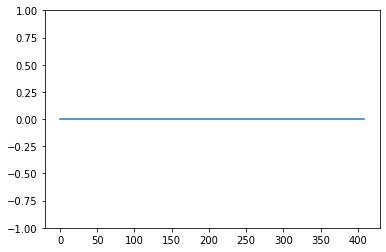

In [52]:
plt.plot((np.array(P_fitter)-np.array(P_code))*100./np.array(P_fitter))
plt.ylim(-1, 1)

In [40]:
# P_new2 = [0.9513756070322977, 0.922063976780647, 0.8810719145406278, 0.7677878791925554, 0.6946404957235568, 0.6075711381156617, 0.5149712473829586, 0.43756677563334023, 0.35542011012604047, 0.27661292388067193, 0.21383250763170703, 0.1773132449061242, 0.16277012616631042, 0.16518112989168768, 0.1775460536490031, 0.19157596474499203, 0.213545593500215, 0.23740873209701474, 0.2651255756991945, 0.29395135699553426, 0.34123102180769216, 0.4094294977883265, 0.4629589077011942, 0.5048235242540264, 0.5778879543935264, 0.6244827679111866, 0.6517682444683245, 0.7182340778187297, 0.7235117602118083, 0.7736640966190615, 0.7904613540791248, 0.8125222684652764, 0.845731306315146, 0.8548098033348529, 0.8893920861640929, 0.898238801012794, 0.9179207397269907, 0.9396094765163369, 0.9269566727329769, 0.9726438678751766, 0.9315286777614268, 0.9749421044523624, 0.9417336908978007, 0.9367159013628221, 0.9551513078908817, 0.8976756528701905, 0.9150088041878206, 0.9037078986320609, 0.8452420567009136, 0.8703609556895539, 0.845965523102804, 0.7897499528614835, 0.8113871210861757, 0.7972135593798079, 0.73732890278023, 0.7439316240459231, 0.7543228689316379, 0.7016563854848925, 0.6755873093390445, 0.697604903363275, 0.6787662057913592, 0.6265751575498719, 0.6198615779415315, 0.6382708504347131, 0.6126505724976599, 0.564305949625487, 0.5552399622907465, 0.5703928751739871, 0.5527417478220182, 0.5062608682474148, 0.48294129793915985, 0.49344892584283906, 0.49474588143272397, 0.4611752588800948, 0.42004362739979084, 0.4067020493905715, 0.41526076875912726, 0.41174259555884823, 0.38141789124977504, 0.3451166912327771, 0.3302778253415092, 0.33733544395958054, 0.3405742371769645, 0.3205359510005348, 0.2877150784580333, 0.26691563219136355, 0.2662109219256888, 0.27340208599090027, 0.2729897757968146, 0.2566786201969035, 0.2308766957089341, 0.2142004672129709, 0.21438319792046798, 0.22218909194250344, 0.22793306296039229, 0.22113253056959636, 0.20254873616219285, 0.18699909226504172, 0.17858092973400908, 0.1840894099248665, 0.19406115391804576, 0.1991879324127443, 0.19647335109737019, 0.18248288310158098, 0.17119823350548263, 0.1617771199152798, 0.1665665117689315, 0.17309977439492566, 0.18526884398140805, 0.18644157694429248, 0.18512386556961935, 0.17253619028882977, 0.1650194502614871, 0.157048360769717, 0.1610508535121849, 0.1673887311178337, 0.17797632023479631, 0.18536377394794626, 0.18514754448594287, 0.1825780132574379, 0.1709765164860625, 0.16580870191054745, 0.15927406374336897, 0.16179296360448087, 0.169428345433909, 0.1764419204979819, 0.18798730139552636, 0.19015411562732965, 0.19039763540762475, 0.1864888207586436, 0.1760933184065878, 0.17158220535512114, 0.16659240450977733, 0.16597254955759222, 0.17399410611207838, 0.18035381597267047, 0.18969042118069512, 0.199414841592248, 0.20103072231800265, 0.20138019143337085, 0.198849936357458, 0.18999299980378045, 0.1840016081271882, 0.1807417450846864, 0.17722928221327502, 0.18029807168308742, 0.18846506348878722, 0.19564599125564297, 0.20494171774436482, 0.21534792615728462, 0.22024741214926033, 0.2214598017224852, 0.22188978338165113, 0.21795387900663057, 0.21066206604042986, 0.20565779872836593, 0.20264992050955047, 0.19997031692172293, 0.20120093354392624, 0.20776500791444022, 0.21586387127043538, 0.2242806905409739, 0.23468114092856582, 0.2450197888336684, 0.2516523539787162, 0.25508733779465825, 0.2571187007021244, 0.2564842917441439, 0.2522097896575037, 0.24685925469438544, 0.2429146854846466, 0.23991183387670623, 0.23757345880932598, 0.23796934749214652, 0.24243911773529198, 0.24948982956859922, 0.25749887918623404, 0.2668662605416749, 0.2778683024391122, 0.2886228089821461, 0.296989140362901, 0.3029623682144832, 0.3075279585297878, 0.3102871802344779, 0.30999950840175866, 0.3069580491856418, 0.303135291060576, 0.2998944819249359, 0.29693106942000996, 0.2939193105729015, 0.29206095865020565, 0.2930771047545054, 0.2971990070403584, 0.3031266417749184, 0.30991375195635107, 0.318012473968481, 0.3280842402202232, 0.33938293146953646, 0.35000628780997095, 0.3586714550239788, 0.3656720120122872, 0.37186708090468384, 0.37712856886366874, 0.3802568660058953, 0.38041763876758067, 0.37827421079025364, 0.3754499543815121, 0.3730026082501001, 0.37069538272149977, 0.3678227284321795, 0.3645442418247596, 0.3621806947942227, 0.3621636872632712, 0.36480961818660157, 0.36921044071813874, 0.37429172208213096, 0.37988987808881963, 0.38676176262206047, 0.3955844402402427, 0.40599991098115573, 0.4166508653567321, 0.4261450346965099, 0.4340142321137654, 0.44079950271308077, 0.44724929195951296, 0.4534155571782499, 0.45846691132922957, 0.46134981833178706, 0.4616829412452796, 0.46010904745701836, 0.4578338932091237, 0.455770208719699, 0.45399614992554543, 0.4519339670631996, 0.44905430528174844, 0.4455138834953772, 0.4422277336119447, 0.4403434803134464, 0.44053757079687766, 0.442657246395896, 0.4459445879377071, 0.449645209823614, 0.4535470989336781, 0.45807829495767016, 0.463925089509728, 0.4714633183812505, 0.4804010050560632, 0.4898624230642729, 0.49883849592480095, 0.5066973765627267, 0.5134327035606654, 0.5195150023731695, 0.5254671756438627, 0.531444471487708, 0.5370753368673958, 0.5416443159623441, 0.5444899027632365, 0.5453737240393333, 0.544610868976599, 0.5429010891606634, 0.5409715876478997, 0.5392374428228548, 0.5376605709955798, 0.5358677656423013, 0.5334461527366637, 0.5302473381675182, 0.5265395110157205, 0.5229365033324159, 0.5201508916621159, 0.5187027946440549, 0.5187284890008236, 0.5199741900849193, 0.5219655234203715, 0.5242609715943501, 0.5266653807438215, 0.5293075852527308, 0.5325557176214736, 0.5368192943619524, 0.5423342952029794, 0.5490280505748817, 0.5565190218773781, 0.5642445820485121, 0.5716560692917312, 0.5783966168509378, 0.584390588138993, 0.5898148431105479, 0.594972013399276, 0.6001235785682311, 0.6053520505067737, 0.6105049554000808, 0.6152376799505024, 0.6191330911454549, 0.6218483283906664, 0.6232325100146331, 0.6233737877612484, 0.6225628300429896, 0.6211907369264817, 0.6196213144725345, 0.6180836601451413, 0.6166205259962744, 0.6151061076408935, 0.6133222730371609, 0.6110633805051737, 0.6082324997381697, 0.6048973860318974, 0.6012899552675672, 0.5977523726837973, 0.5946496480280187, 0.5922777645393206, 0.5907957159314386, 0.5902004924921952, 0.5903496974218281, 0.5910218882651952, 0.5919943022959622, 0.593114037959761, 0.5943424428156366, 0.5957616691297426, 0.5975439587687161, 0.5998947085618781, 0.6029869125275197, 0.6069057273768016, 0.6116178403600268, 0.6169726113774519, 0.6227330112288906, 0.6286266709460878, 0.634402802225251, 0.6398802426158676, 0.644975185054585, 0.6497030851992623, 0.6541560730228904, 0.658463146617838, 0.6627441106746108, 0.6670689461458319, 0.6714321527226026, 0.6757473612216188, 0.6798623594022719, 0.6835898981795632, 0.6867463173191993, 0.6891887837595446, 0.690842869269798, 0.6917149046511689, 0.6918872761023502, 0.6914986664466043, 0.6907143454696386, 0.6896933767056251, 0.6885597747079052, 0.6873833223673483, 0.6861733498371967, 0.6848858781438543, 0.683441778092925, 0.6817515339224222, 0.6797411847548973, 0.6773741562572436, 0.674664862056961, 0.6716818326427995, 0.6685402945462666, 0.6653861359086588, 0.6623746880982012, 0.659648491661138, 0.6573181263512108, 0.6554493565011837, 0.6540584887135876, 0.653116247779889, 0.6525589530628627, 0.652304584849631, 0.6522706489897059, 0.6523906530380074, 0.652626464623177, 0.6529747080899931, 0.653466483117549, 0.654160850173396, 0.6551335273927354, 0.656462931514874, 0.6582159863521249, 0.6604360024495125, 0.6631344545940622, 0.6662877548011668, 0.6698392723835139, 0.6737060305231205, 0.6777888346517723, 0.6819841521420683, 0.6861959112534426, 0.6903455190908333, 0.6943787706275494, 0.698268859229799, 0.7020153117374175, 0.7056392637401077, 0.709175980377895, 0.7126658540182582, 0.7161452402563806, 0.719638425807954, 0.7231517815148435, 0.7266707876956342, 0.7301601871394074, 0.7335670863929664, 0.7368264465808083, 0.7398681263135106, 0.7426244895336293, 0.7450375794124796, 0.747064976082539, 0.7486836759647755, 0.7498916177713657, 0.7507067936965001, 0.7511641829937545, 0.7513109936210295, 0.7512008696933162, 0.7508878034455388, 0.7504204778150517, 0.7498376684974906, 0.7491651705192187]
# plt.plot(E, P_new2)
# plt.show()
# np.savez('Sindhu_new_P-ee_NO_PDG2022_no-matter-effect.npz', energy=E, probability=np.array(P_new2))

In [41]:
# plt.plot(E, (np.array(P_new)-np.array(P_new2))*100./np.array(P_new))
# plt.ylim(-10, 10)
# plt.axhline(y=0, color='black', linewidth=2, linestyle=':')
# plt.show()



In [193]:
# 